In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
data = pd.read_csv("creditcard.csv")
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
data_shuffled = data.sample(frac=1,random_state=42) 
data_shuffled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


 1. Randomly shuffle the dataset by taking a random seed of “42”. Create a testing set from the last 20% rows of the dataframe (these must be the same for all the students). The remaining rows will be the training + validation set, with training : validation ratio of 80% : 20%.

In [4]:
test = data_shuffled.tail(56962)
test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213180,139142.0,1.832595,-0.584732,-0.819403,-0.149297,0.329139,1.313078,-0.593704,0.446035,1.045166,...,-0.298464,-0.616808,0.415845,-1.659516,-0.647589,-0.304438,0.044485,-0.062264,30.00,0
67,44.0,-0.948896,0.248414,2.956914,2.813750,0.145539,-0.027353,0.133702,-0.307535,-0.125244,...,-0.083647,0.416090,0.207537,0.716064,-0.602311,-0.064230,-0.315058,-0.272463,0.75,0
32212,36690.0,-0.584534,0.516797,2.690273,1.666086,-0.497783,0.712059,0.238978,0.218306,0.836184,...,-0.400695,-0.460325,-0.017198,0.375110,-0.138729,-0.416343,0.268763,-0.034817,29.45,0
139298,83093.0,1.003421,0.193060,1.620985,2.690939,-0.543496,0.913447,-0.657412,0.385481,-0.010028,...,0.001964,0.243906,0.133628,0.100668,0.123590,-0.006763,0.079287,0.034553,6.47,0
270149,163938.0,-0.236620,1.154627,-0.528508,-0.853377,0.848756,-0.221496,0.622917,0.336601,-0.319941,...,-0.257840,-0.676206,0.058260,-0.010006,-0.328057,0.155501,0.125989,0.035221,1.98,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98,0
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23,0
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94,0
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00,0


In [5]:
TV=data_shuffled.drop(test.index)

In [6]:
train = TV.sample(frac=0.8,random_state=42)
TV = TV.drop(train.index)
validation = TV

In [7]:
train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
96376,65743.0,1.302477,-0.866397,0.785250,-0.597110,-1.518418,-0.499402,-0.994682,0.001884,-0.275751,...,-0.228542,-0.283978,-0.010913,0.052434,0.073435,1.128502,-0.036148,0.021291,48.00,0
35345,38079.0,-1.031103,1.818406,0.136551,0.698094,-0.094033,-0.366810,0.159960,0.693414,-0.883850,...,0.162482,0.384328,-0.167306,-0.419153,-0.018059,-0.276089,0.040598,0.089207,13.95,0
154874,103443.0,1.895993,-0.011263,-1.697574,0.535603,1.018850,0.184163,0.361167,-0.175396,1.694461,...,-0.006438,0.578767,0.063445,-1.033252,0.192139,-0.121096,-0.012608,-0.080000,33.00,0
224584,143870.0,0.053089,0.526993,1.286889,0.281747,-0.634208,0.134735,-0.868736,-1.569898,0.507947,...,1.658080,0.036417,-0.339205,0.062116,0.761358,0.882561,0.203204,0.223315,11.50,0
35871,38302.0,-0.196442,0.184731,1.951985,2.008439,-0.044212,1.298077,-0.426111,0.526389,0.336384,...,-0.255556,-0.299140,0.082896,-0.281839,-0.436925,-0.344782,0.172683,0.053057,14.95,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135689,81359.0,-1.931266,-1.011780,-0.612234,-0.299611,-2.330982,0.000028,3.265720,-0.010687,-0.526067,...,0.510387,0.207153,1.770508,0.381687,-0.152602,0.811349,-0.078503,0.216781,774.93,0
170267,120101.0,2.036483,0.107383,-1.505696,0.547835,0.086360,-1.196662,0.139343,-0.220991,0.588743,...,-0.340098,-0.920511,0.413173,1.028598,-0.356345,0.142460,-0.067796,-0.026925,2.58,0
267464,162784.0,1.762345,-0.845320,0.597132,0.702579,-1.642481,-0.298154,-1.217215,0.273943,1.415258,...,0.325413,0.920293,0.262379,0.553398,-0.669432,0.274798,0.006122,-0.027950,59.90,0
126976,78165.0,-0.463816,1.393423,2.264570,3.267127,0.265986,0.238790,0.696579,0.118520,-1.505531,...,-0.205537,-0.571200,-0.044516,0.333909,-0.107701,-0.227733,0.058558,0.071475,11.34,0


In [8]:
validation

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101565,67878.0,-0.641330,-0.057304,1.489998,-1.688131,-1.151043,0.259996,-1.391069,-2.334075,1.168644,...,-1.231634,0.257164,-0.371953,-0.038566,1.397514,-0.665947,0.031003,0.180357,100.00,0
134976,81055.0,-1.593002,0.756803,1.274002,0.244127,0.335045,0.272886,0.389542,0.676944,-0.579539,...,0.031681,-0.063355,-0.268928,-0.321186,0.681500,-0.390287,-0.195158,-0.039483,43.50,0
246697,153290.0,-3.608205,-1.471144,0.327140,0.149964,3.666915,-2.701360,-1.340508,-0.522986,1.115929,...,-0.746814,-0.033316,-1.690792,1.249015,-0.608078,0.326580,0.991899,-0.059786,8.54,0
68279,52913.0,0.676855,1.587029,-1.508147,1.443815,1.316790,-1.160342,1.149049,-0.419393,-0.090565,...,-0.191418,0.101451,0.058298,-0.135311,-0.604406,-0.452763,0.046430,-0.383642,0.89,0
26525,34118.0,1.453447,-0.974690,-0.134962,-1.418547,-1.057755,-0.948851,-0.461141,-0.350840,-2.149149,...,-0.556625,-1.398363,0.089571,-0.177538,0.290735,-0.504811,-0.000739,0.025708,76.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139747,83329.0,-2.654861,-2.573636,2.982088,0.177964,0.196961,-0.464111,-0.467951,0.247670,1.446265,...,0.158013,0.104976,0.650700,0.476358,0.522876,1.031481,-0.059338,-0.041721,284.14,0
218891,141514.0,-1.266761,0.567688,-1.137906,1.140781,0.687028,-0.672608,0.229731,0.582142,-0.896083,...,0.529202,1.416237,0.357878,0.650359,-0.822816,-0.499649,0.094544,-0.153482,6.17,0
160717,113577.0,-0.406916,0.495423,-0.222752,-0.790593,0.824570,-1.255726,1.245641,-0.229602,0.276791,...,-0.027158,-0.066620,0.205440,-0.136297,-0.761071,-0.340946,0.185565,0.269985,84.65,0
281540,170250.0,-3.296875,2.924985,-2.237114,-0.999462,-0.247988,-1.252690,0.063705,0.683266,1.594078,...,0.046986,0.280853,-0.069211,0.613813,0.330438,0.590084,0.103159,0.648336,6.00,0


Determine A) number of rows in training, validation and test sets, along with the structure, datatypes and value counts of the dataframes.

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56962 entries, 213180 to 121958
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56962 non-null  float64
 1   V1      56962 non-null  float64
 2   V2      56962 non-null  float64
 3   V3      56962 non-null  float64
 4   V4      56962 non-null  float64
 5   V5      56962 non-null  float64
 6   V6      56962 non-null  float64
 7   V7      56962 non-null  float64
 8   V8      56962 non-null  float64
 9   V9      56962 non-null  float64
 10  V10     56962 non-null  float64
 11  V11     56962 non-null  float64
 12  V12     56962 non-null  float64
 13  V13     56962 non-null  float64
 14  V14     56962 non-null  float64
 15  V15     56962 non-null  float64
 16  V16     56962 non-null  float64
 17  V17     56962 non-null  float64
 18  V18     56962 non-null  float64
 19  V19     56962 non-null  float64
 20  V20     56962 non-null  float64
 21  V21     56962 non-null  float

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182276 entries, 96376 to 90781
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    182276 non-null  float64
 1   V1      182276 non-null  float64
 2   V2      182276 non-null  float64
 3   V3      182276 non-null  float64
 4   V4      182276 non-null  float64
 5   V5      182276 non-null  float64
 6   V6      182276 non-null  float64
 7   V7      182276 non-null  float64
 8   V8      182276 non-null  float64
 9   V9      182276 non-null  float64
 10  V10     182276 non-null  float64
 11  V11     182276 non-null  float64
 12  V12     182276 non-null  float64
 13  V13     182276 non-null  float64
 14  V14     182276 non-null  float64
 15  V15     182276 non-null  float64
 16  V16     182276 non-null  float64
 17  V17     182276 non-null  float64
 18  V18     182276 non-null  float64
 19  V19     182276 non-null  float64
 20  V20     182276 non-null  float64
 21  V21    

In [11]:
validation.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45569 entries, 101565 to 166978
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    45569 non-null  float64
 1   V1      45569 non-null  float64
 2   V2      45569 non-null  float64
 3   V3      45569 non-null  float64
 4   V4      45569 non-null  float64
 5   V5      45569 non-null  float64
 6   V6      45569 non-null  float64
 7   V7      45569 non-null  float64
 8   V8      45569 non-null  float64
 9   V9      45569 non-null  float64
 10  V10     45569 non-null  float64
 11  V11     45569 non-null  float64
 12  V12     45569 non-null  float64
 13  V13     45569 non-null  float64
 14  V14     45569 non-null  float64
 15  V15     45569 non-null  float64
 16  V16     45569 non-null  float64
 17  V17     45569 non-null  float64
 18  V18     45569 non-null  float64
 19  V19     45569 non-null  float64
 20  V20     45569 non-null  float64
 21  V21     45569 non-null  float

 Analyse the data.

In [12]:
test.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [13]:
train.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [14]:
validation.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Check for missing values and logically impute the dataset. Normalize the columns.

In [15]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# copy the data
df_sklearn_test = test.copy()

# apply normalization techniques
column1 = 'V1'
column2 = 'V2'
column3 = 'V3'
column4 = 'V4'
column5 = 'V5'
column6 = 'V6'
column7 = 'V7'
column8 = 'V8'
column9 = 'V9'
column10 = 'V10'
column11 = 'V11'
column12 = 'V12'
column13 = 'V13'
column14 = 'V14'
column15 = 'V15'
column16 = 'V16'
column17 = 'V17'
column18 = 'V18'
column19 = 'V19'
column20 = 'V20'
column21 = 'V21'
column22 = 'V22'
column23 = 'V23'
column24 = 'V24'
column25 = 'V25'
column26 = 'V26'
column27 = 'V27'
column28 = 'V28'
column29 = 'Amount'
column30 = 'Class'

df_sklearn_test[column1] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column1]).reshape(-1,1))
df_sklearn_test[column2] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column2]).reshape(-1,1))
df_sklearn_test[column3] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column3]).reshape(-1,1))
df_sklearn_test[column4] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column4]).reshape(-1,1))
df_sklearn_test[column5] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column5]).reshape(-1,1))
df_sklearn_test[column6] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column6]).reshape(-1,1))
df_sklearn_test[column7] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column7]).reshape(-1,1))
df_sklearn_test[column8] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column8]).reshape(-1,1))
df_sklearn_test[column9] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column9]).reshape(-1,1))
df_sklearn_test[column10] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column10]).reshape(-1,1))
df_sklearn_test[column11] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column11]).reshape(-1,1))
df_sklearn_test[column12] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column12]).reshape(-1,1))
df_sklearn_test[column13] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column13]).reshape(-1,1))
df_sklearn_test[column14] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column14]).reshape(-1,1))
df_sklearn_test[column15] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column15]).reshape(-1,1))
df_sklearn_test[column16] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column16]).reshape(-1,1))
df_sklearn_test[column17] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column17]).reshape(-1,1))
df_sklearn_test[column18] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column18]).reshape(-1,1))
df_sklearn_test[column19] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column19]).reshape(-1,1))
df_sklearn_test[column20] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column20]).reshape(-1,1))
df_sklearn_test[column21] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column21]).reshape(-1,1))
df_sklearn_test[column22] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column22]).reshape(-1,1))
df_sklearn_test[column23] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column23]).reshape(-1,1))
df_sklearn_test[column24] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column24]).reshape(-1,1))
df_sklearn_test[column25] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column25]).reshape(-1,1))
df_sklearn_test[column26] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column26]).reshape(-1,1))
df_sklearn_test[column27] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column27]).reshape(-1,1))
df_sklearn_test[column28] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column28]).reshape(-1,1))
df_sklearn_test[column29] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column29]).reshape(-1,1))
df_sklearn_test[column30] = MinMaxScaler().fit_transform(np.array(df_sklearn_test[column30]).reshape(-1,1))

# view normalized data
display(df_sklearn_test)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
213180,139142.0,0.989427,0.761089,0.909200,0.232791,0.767932,0.276222,0.261739,0.684297,0.607508,...,0.503367,0.535930,0.495516,0.150605,0.495268,0.374774,0.232969,0.311860,0.001168,0.0
67,44.0,0.942173,0.769879,0.981473,0.367584,0.766696,0.262745,0.266170,0.671868,0.558012,...,0.508173,0.589588,0.490764,0.473760,0.498784,0.415145,0.224233,0.307595,0.000029,0.0
32212,36690.0,0.948363,0.772711,0.976370,0.315375,0.762365,0.270179,0.266811,0.680541,0.598671,...,0.501079,0.544059,0.485637,0.427380,0.534781,0.355966,0.238418,0.312417,0.001146,0.0
139298,83093.0,0.975341,0.769295,0.955905,0.361998,0.762058,0.272204,0.261350,0.683298,0.562884,...,0.510088,0.580643,0.489078,0.390047,0.555150,0.424804,0.233815,0.313825,0.000252,0.0
270149,163938.0,0.954274,0.779441,0.914767,0.200761,0.771430,0.260793,0.269150,0.682492,0.549778,...,0.504275,0.532844,0.487358,0.374991,0.520080,0.452075,0.234949,0.313839,0.000077,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,0.978230,0.768322,0.934270,0.260581,0.763721,0.260877,0.264349,0.678907,0.558479,...,0.505882,0.538139,0.489711,0.375517,0.552654,0.444299,0.231380,0.313204,0.000077,0.0
259178,159000.0,0.945111,0.768778,0.903018,0.183122,0.778779,0.302352,0.262516,0.699381,0.580254,...,0.510874,0.566956,0.491546,0.469238,0.418587,0.296370,0.233492,0.315905,0.003473,0.0
131932,79795.0,0.955803,0.777735,0.954061,0.261681,0.768068,0.254824,0.271915,0.670420,0.542531,...,0.511222,0.586367,0.479386,0.431153,0.563986,0.358971,0.228945,0.309142,0.000153,0.0
146867,87931.0,0.908200,0.792106,0.876630,0.066764,0.778280,0.290444,0.262481,0.713514,0.587845,...,0.502599,0.513555,0.489299,0.468701,0.570379,0.497589,0.243962,0.319939,0.000039,0.0


In [16]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# copy the data
df_sklearn_train = train.copy()

# apply normalization techniques
column1 = 'V1'
column2 = 'V2'
column3 = 'V3'
column4 = 'V4'
column5 = 'V5'
column6 = 'V6'
column7 = 'V7'
column8 = 'V8'
column9 = 'V9'
column10 = 'V10'
column11 = 'V11'
column12 = 'V12'
column13 = 'V13'
column14 = 'V14'
column15 = 'V15'
column16 = 'V16'
column17 = 'V17'
column18 = 'V18'
column19 = 'V19'
column20 = 'V20'
column21 = 'V21'
column22 = 'V22'
column23 = 'V23'
column24 = 'V24'
column25 = 'V25'
column26 = 'V26'
column27 = 'V27'
column28 = 'V28'
column29 = 'Amount'
column30 = 'Class'

df_sklearn_train[column1] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column1]).reshape(-1,1))
df_sklearn_train[column2] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column2]).reshape(-1,1))
df_sklearn_train[column3] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column3]).reshape(-1,1))
df_sklearn_train[column4] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column4]).reshape(-1,1))
df_sklearn_train[column5] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column5]).reshape(-1,1))
df_sklearn_train[column6] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column6]).reshape(-1,1))
df_sklearn_train[column7] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column7]).reshape(-1,1))
df_sklearn_train[column8] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column8]).reshape(-1,1))
df_sklearn_train[column9] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column9]).reshape(-1,1))
df_sklearn_train[column10] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column10]).reshape(-1,1))
df_sklearn_train[column11] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column11]).reshape(-1,1))
df_sklearn_train[column12] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column12]).reshape(-1,1))
df_sklearn_train[column13] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column13]).reshape(-1,1))
df_sklearn_train[column14] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column14]).reshape(-1,1))
df_sklearn_train[column15] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column15]).reshape(-1,1))
df_sklearn_train[column16] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column16]).reshape(-1,1))
df_sklearn_train[column17] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column17]).reshape(-1,1))
df_sklearn_train[column18] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column18]).reshape(-1,1))
df_sklearn_train[column19] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column19]).reshape(-1,1))
df_sklearn_train[column20] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column20]).reshape(-1,1))
df_sklearn_train[column21] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column21]).reshape(-1,1))
df_sklearn_train[column22] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column22]).reshape(-1,1))
df_sklearn_train[column23] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column23]).reshape(-1,1))
df_sklearn_train[column24] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column24]).reshape(-1,1))
df_sklearn_train[column25] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column25]).reshape(-1,1))
df_sklearn_train[column26] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column26]).reshape(-1,1))
df_sklearn_train[column27] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column27]).reshape(-1,1))
df_sklearn_train[column28] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column28]).reshape(-1,1))
df_sklearn_train[column29] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column29]).reshape(-1,1))
df_sklearn_train[column30] = MinMaxScaler().fit_transform(np.array(df_sklearn_train[column30]).reshape(-1,1))

# view normalized data
display(df_sklearn_train)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
96376,65743.0,0.976795,0.727412,0.800358,0.225461,0.541273,0.459396,0.473487,0.785406,0.453281,...,0.557795,0.460714,0.699558,0.421578,0.582029,0.609787,0.681195,0.341738,0.002538,0.0
35345,38079.0,0.929463,0.760181,0.785294,0.282876,0.561088,0.462332,0.486982,0.792824,0.432333,...,0.564099,0.494125,0.697116,0.352763,0.576893,0.380350,0.683515,0.343716,0.000738,0.0
154874,103443.0,0.988834,0.737850,0.742703,0.275673,0.576570,0.474530,0.489333,0.783504,0.521151,...,0.561376,0.503846,0.700719,0.263152,0.588692,0.405668,0.681906,0.338787,0.001745,0.0
224584,143870.0,0.951454,0.744419,0.812006,0.264420,0.553574,0.473436,0.474959,0.768545,0.480278,...,0.588208,0.476732,0.694431,0.422991,0.620644,0.569613,0.688431,0.347622,0.000608,0.0
35871,38302.0,0.946392,0.740242,0.827451,0.340963,0.561781,0.499193,0.480132,0.791032,0.474368,...,0.557360,0.459956,0.701023,0.372800,0.553381,0.369129,0.687509,0.342663,0.000791,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135689,81359.0,0.911204,0.725638,0.767906,0.238649,0.529970,0.470454,0.523280,0.785271,0.444658,...,0.569707,0.485268,0.727377,0.469623,0.569341,0.557981,0.679914,0.347432,0.040980,0.0
170267,120101.0,0.991683,0.739298,0.747158,0.276215,0.563598,0.443958,0.486741,0.783015,0.483061,...,0.555997,0.428892,0.706181,0.564022,0.557904,0.448719,0.680238,0.340333,0.000136,0.0
267464,162784.0,0.986123,0.727670,0.795989,0.283075,0.539547,0.463852,0.470886,0.788324,0.511533,...,0.566725,0.520920,0.703826,0.494680,0.540330,0.470336,0.682473,0.340303,0.003168,0.0
126976,78165.0,0.940969,0.754994,0.834710,0.396759,0.566096,0.475740,0.493253,0.786657,0.410917,...,0.558166,0.446355,0.699033,0.462651,0.571861,0.388249,0.684058,0.343199,0.000600,0.0


In [17]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# copy the data
df_sklearn_validation = validation.copy()

# apply normalization techniques
column1 = 'V1'
column2 = 'V2'
column3 = 'V3'
column4 = 'V4'
column5 = 'V5'
column6 = 'V6'
column7 = 'V7'
column8 = 'V8'
column9 = 'V9'
column10 = 'V10'
column11 = 'V11'
column12 = 'V12'
column13 = 'V13'
column14 = 'V14'
column15 = 'V15'
column16 = 'V16'
column17 = 'V17'
column18 = 'V18'
column19 = 'V19'
column20 = 'V20'
column21 = 'V21'
column22 = 'V22'
column23 = 'V23'
column24 = 'V24'
column25 = 'V25'
column26 = 'V26'
column27 = 'V27'
column28 = 'V28'
column29 = 'Amount'
column30 = 'Class'

df_sklearn_validation[column1] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column1]).reshape(-1,1))
df_sklearn_validation[column2] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column2]).reshape(-1,1))
df_sklearn_validation[column3] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column3]).reshape(-1,1))
df_sklearn_validation[column4] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column4]).reshape(-1,1))
df_sklearn_validation[column5] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column5]).reshape(-1,1))
df_sklearn_validation[column6] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column6]).reshape(-1,1))
df_sklearn_validation[column7] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column7]).reshape(-1,1))
df_sklearn_validation[column8] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column8]).reshape(-1,1))
df_sklearn_validation[column9] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column9]).reshape(-1,1))
df_sklearn_validation[column10] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column10]).reshape(-1,1))
df_sklearn_validation[column11] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column11]).reshape(-1,1))
df_sklearn_validation[column12] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column12]).reshape(-1,1))
df_sklearn_validation[column13] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column13]).reshape(-1,1))
df_sklearn_validation[column14] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column14]).reshape(-1,1))
df_sklearn_validation[column15] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column15]).reshape(-1,1))
df_sklearn_validation[column16] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column16]).reshape(-1,1))
df_sklearn_validation[column17] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column17]).reshape(-1,1))
df_sklearn_validation[column18] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column18]).reshape(-1,1))
df_sklearn_validation[column19] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column19]).reshape(-1,1))
df_sklearn_validation[column20] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column20]).reshape(-1,1))
df_sklearn_validation[column21] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column21]).reshape(-1,1))
df_sklearn_validation[column22] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column22]).reshape(-1,1))
df_sklearn_validation[column23] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column23]).reshape(-1,1))
df_sklearn_validation[column24] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column24]).reshape(-1,1))
df_sklearn_validation[column25] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column25]).reshape(-1,1))
df_sklearn_validation[column26] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column26]).reshape(-1,1))
df_sklearn_validation[column27] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column27]).reshape(-1,1))
df_sklearn_validation[column28] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column28]).reshape(-1,1))
df_sklearn_validation[column29] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column29]).reshape(-1,1))
df_sklearn_validation[column30] = MinMaxScaler().fit_transform(np.array(df_sklearn_validation[column30]).reshape(-1,1))

# view normalized data
display(df_sklearn_validation)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
101565,67878.0,0.912657,0.670372,0.929541,0.241650,0.537683,0.516158,0.455518,0.637038,0.601910,...,0.379240,0.573500,0.465582,0.406705,0.605829,0.219069,0.448982,0.380552,0.011376,0.0
134976,81055.0,0.885785,0.685083,0.923714,0.362241,0.557174,0.516438,0.480986,0.688973,0.514304,...,0.406820,0.553398,0.468033,0.365420,0.545437,0.275987,0.438702,0.372014,0.004949,0.0
246697,153290.0,0.828882,0.644822,0.898169,0.356365,0.600872,0.451817,0.456241,0.668276,0.599269,...,0.389825,0.555282,0.434195,0.594795,0.436668,0.424005,0.492663,0.371225,0.000972,0.0
68279,52913.0,0.949879,0.700086,0.848656,0.437114,0.570050,0.485299,0.491849,0.670063,0.538808,...,0.401950,0.563734,0.475821,0.392572,0.436977,0.263087,0.449684,0.358647,0.000101,0.0
26525,34118.0,0.971807,0.653794,0.885702,0.258474,0.538907,0.489894,0.468818,0.671245,0.435647,...,0.393977,0.469670,0.476565,0.386404,0.512478,0.252340,0.447540,0.374546,0.008646,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139747,83329.0,0.855801,0.624899,0.969795,0.358112,0.555363,0.500426,0.468721,0.681569,0.615823,...,0.409578,0.563955,0.489920,0.481925,0.532058,0.569551,0.444876,0.371927,0.032324,0.0
218891,141514.0,0.894997,0.681666,0.858645,0.418201,0.561790,0.495896,0.478700,0.687338,0.498442,...,0.417682,0.646194,0.482951,0.507343,0.418556,0.253406,0.451871,0.367586,0.000702,0.0
160717,113577.0,0.919276,0.680360,0.883334,0.297665,0.563594,0.483226,0.493230,0.673336,0.557217,...,0.405536,0.553193,0.479323,0.392428,0.423763,0.286175,0.456009,0.384033,0.009630,0.0
281540,170250.0,0.837673,0.724264,0.828990,0.284629,0.549527,0.483292,0.476325,0.689082,0.623230,...,0.407154,0.574986,0.472787,0.502005,0.515826,0.478412,0.452263,0.398728,0.000683,0.0


Train a logistic regression model on the training set partition by taking all the features. Calculate the error on the validation set.

In [18]:
data_shuffled.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

Inference: The dataset is quite imbalanced as almost 99% of dataset lies in legit category.
0: Legit Transaction 1: Fraudulent Transaction

In [19]:
legit = data_shuffled[data_shuffled.Class == 0]
fraud = data_shuffled[data_shuffled.Class == 1]

print(legit.shape, fraud.shape)


(284315, 31) (492, 31)


In [20]:
df_sklearn_train.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0.0,94786.851874,0.950667,0.737902,0.782421,0.251635,0.562469,0.470492,0.485216,0.785391,0.462801,...,0.423583,0.561475,0.474818,0.699733,0.413937,0.577943,0.425424,0.682272,0.341112,0.004654
1.0,80321.666667,0.844057,0.784061,0.611334,0.451870,0.516139,0.438491,0.416616,0.792648,0.371533,...,0.429463,0.572234,0.475829,0.698588,0.396059,0.581108,0.428535,0.686737,0.342829,0.006512


From the above data we can infer that the difference in the feature and average transaction amount are high for fraud transaction when compared to legit transaction

In [21]:
legitSample = data_shuffled.sample(n=492)

In [22]:
df_new = pd.concat([legitSample,fraud],axis=0)
df_new

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
202716,134457.0,1.793422,0.299002,-0.963626,3.422377,1.221984,1.837163,-0.173703,0.445799,-1.060098,...,0.379773,1.272053,-0.014857,-1.618795,0.053356,0.355734,0.010487,-0.078875,10.62,0
86385,61210.0,-0.374056,0.954433,1.537871,0.921676,0.351973,-0.027871,1.308941,-0.588589,-0.339304,...,0.084832,0.656406,-0.242210,0.104150,-0.271291,-0.308618,-0.382551,-0.314940,60.98,0
38437,39393.0,-0.564448,0.845147,-0.563832,-0.298278,-0.814236,-0.711808,-0.420679,0.557716,-2.229734,...,-0.059764,0.038882,0.228728,0.074576,-1.318135,1.064465,-0.321398,0.082395,8.50,0
194610,130680.0,0.185564,1.164883,-1.046875,0.010641,0.281740,-1.456382,0.629786,0.091832,-0.188164,...,0.329242,0.945124,-0.074683,-0.029147,-0.262192,-0.153192,-0.069167,-0.043434,18.00,0
111564,72275.0,-0.755126,0.558822,1.159600,-1.622096,0.379060,-0.655795,0.888093,-0.530559,-1.535842,...,-0.255245,-0.596393,-0.383195,-0.448010,0.475237,-0.431820,-0.115133,-0.121671,39.43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42674,41194.0,-7.896886,5.381020,-8.451162,7.963928,-7.862419,-2.376820,-11.949723,5.051356,-6.912076,...,2.557944,0.926278,0.032795,0.638073,0.361887,0.444577,1.101923,0.205958,1.52,1
33276,37167.0,-7.923891,-5.198360,-3.000024,4.420666,2.272194,-3.394483,-5.283435,0.131619,0.658176,...,-0.734308,-0.599926,-4.908301,0.410170,-1.167660,0.520508,1.937421,-1.552593,12.31,1
182992,125612.0,1.889618,1.073099,-1.678018,4.173268,1.015516,-0.009389,-0.079706,0.064071,-0.714517,...,0.203728,0.733796,-0.036560,0.334306,0.147171,0.279556,0.031669,0.035883,3.22,1
154697,102625.0,-4.221221,2.871121,-5.888716,6.890952,-3.404894,-1.154394,-7.739928,2.851363,-2.507569,...,1.620591,1.567947,-0.578007,-0.059045,-1.829169,-0.072429,0.136734,-0.599848,7.59,1


In [23]:
X=df_new.drop(columns="Class",axis=1)
Y=df_new["Class"]

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(984, 30) (787, 30) (197, 30)
(984,) (787,) (197,)


In [25]:
modelL = LogisticRegression()

In [26]:
modelL.fit(X_train,Y_train)

LogisticRegression()

In [27]:
trainPrediction= modelL.predict(X_train)
print(len(X_train))

787


In [28]:
# df_sklearn_test=df_sklearn_test.drop(columns="Class",axis=1)
testPrediction= modelL.predict(X_test)

In [29]:
# Y_train = df_sklearn_train['Class']
print(f"The accuracy score on training data is : {round(accuracy_score(testPrediction, Y_test),2)}")

The accuracy score on training data is : 0.92


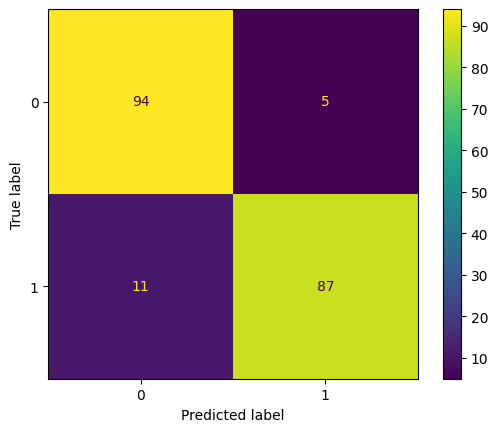

In [30]:
cf_matrix_train = confusion_matrix(Y_test, testPrediction)
cm_display_train = ConfusionMatrixDisplay(cf_matrix_train).plot()

In [31]:
# precision
precision_test = precision_score(Y_test, testPrediction)
print(f"The precision on test data is : {round(precision_test, 2)}")
# recall
recall_test = recall_score(Y_test, testPrediction)
print(f"The recall on test data is : {round(recall_test, 2)}")

The precision on test data is : 0.95
The recall on test data is : 0.89


Train a neural network model (MLPClassifier) by taking all the features and predicting the result. Fix the random_state for training. Choose the solver as ‘adam’, and set the number of hidden layers to (10, 2).

In [32]:
modelMLP = MLPClassifier(solver='adam',hidden_layer_sizes=(10,2))
modelMLP.fit(X_train,Y_train)

MLPClassifier(hidden_layer_sizes=(10, 2))

In [33]:
trainPredictionMLP = modelMLP.predict(X_train)
testPredictionMLP = modelMLP.predict(X_test)

In [34]:
# Y_train = df_sklearn_train['Class']
print(f"The accuracy score on training data is : {round(accuracy_score(testPredictionMLP, Y_test),2)}")

The accuracy score on training data is : 0.5


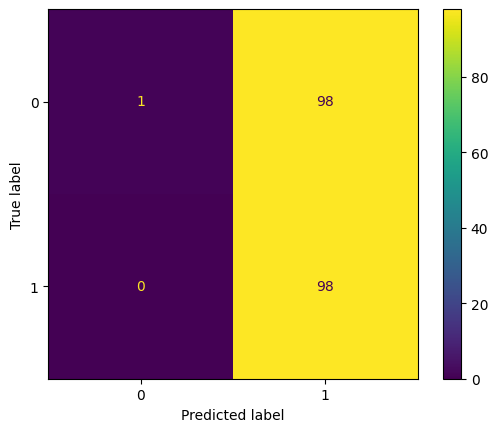

In [35]:
cf_matrix_train = confusion_matrix(Y_test, testPredictionMLP)
cm_display_train = ConfusionMatrixDisplay(cf_matrix_train).plot()

Vary the hidden layers to find the best set of results on validation set. Explore different training parameters of MLP.

In [36]:
# precision
precision_test = precision_score(Y_test, testPredictionMLP)
print(f"The precision on test data is : {round(precision_test, 2)}")
# recall
recall_test = recall_score(Y_test, testPredictionMLP)
print(f"The recall on test data is : {round(recall_test, 2)}")

The precision on test data is : 0.5
The recall on test data is : 1.0


In [37]:
modelMLP = MLPClassifier(solver='adam',hidden_layer_sizes=(25,2),max_iter=25)
modelMLP.fit(X_train,Y_train)
testPredictionMLP = modelMLP.predict(X_test)
# Y_train = df_sklearn_train['Class']
print(f"The accuracy score on training data is : {round(accuracy_score(testPredictionMLP, Y_test),2)}")

The accuracy score on training data is : 0.5


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


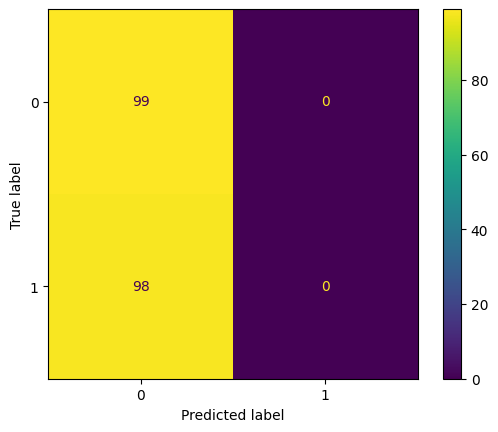

In [38]:
cf_matrix_train = confusion_matrix(Y_test, testPredictionMLP)
cm_display_train = ConfusionMatrixDisplay(cf_matrix_train).plot()

In [39]:
# precision
precision_test = precision_score(Y_test, testPredictionMLP)
print(f"The precision on test data is : {round(precision_test, 2)}")
# recall
recall_test = recall_score(Y_test, testPredictionMLP)
print(f"The recall on test data is : {round(recall_test, 2)}")

The precision on test data is : 0.0
The recall on test data is : 0.0


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [40]:
modelMLP = MLPClassifier(solver='adam',hidden_layer_sizes=(50,2),max_iter=50)
modelMLP.fit(X_train,Y_train)
testPredictionMLP = modelMLP.predict(X_test)
# Y_train = df_sklearn_train['Class']
print(f"The accuracy score on training data is : {round(accuracy_score(testPredictionMLP, Y_test),2)}")

The accuracy score on training data is : 0.5


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


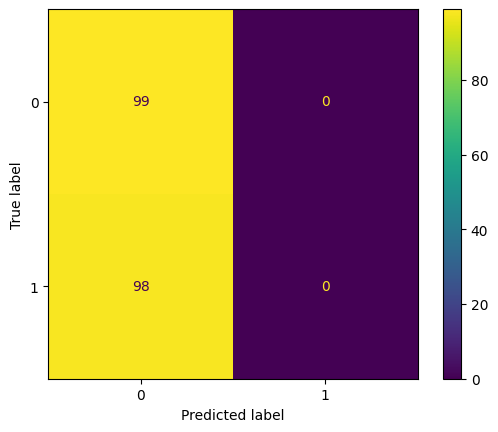

In [41]:
cf_matrix_train = confusion_matrix(Y_test, testPredictionMLP)
cm_display_train = ConfusionMatrixDisplay(cf_matrix_train).plot()

In [42]:
# precision
precision_test = precision_score(Y_test, testPredictionMLP)
print(f"The precision on test data is : {round(precision_test, 2)}")
# recall
recall_test = recall_score(Y_test, testPredictionMLP)
print(f"The recall on test data is : {round(recall_test, 2)}")

The precision on test data is : 0.0
The recall on test data is : 0.0


c:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
